# Chem 18：面向现代化学家的数据科学入门

> 授课教师： [Yuki Oyama](mailto:y.oyama@lrcs.ac), [Prprnya](mailto:nya@prpr.zip)
>
> 克里斯蒂安·弗雷德里希·魏希曼化学系, 拉斯托利亚皇家理学院

本材料采用<a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.zh-hans">知识共享 署名-非商业性使用-相同方式共享 4.0</a> 许可协议授权<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/by.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/nc.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;"><img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg" alt="" style="max-width: 1em;max-height:1em;margin-left: .2em;">

欢迎来到 Chem 18：面向现代化学家的数据科学入门!

在这门课里，我们会学点大的——用 Python 编程语言做计算、分析、数据展示。作为化学家，数据是我们的一切；没有数据，我们就没办法支持的假设，验证发现，以及有效传达我们漂亮的研究成果～清晰地处理、可视化数据，一定会是是未来化学研究的关键技能。

这门课的节奏由你自己决定。我们提供的这份交互式的 Jupyter 笔记本里已经囊括了你所有需要的内容。你只需要自己运行这些 Jupyter 笔记本，以实践的方式学习，就能有很大的收获。在学习的过程中，你可能会发现许多概念看起来会很熟悉，这很好——用 Python 做数据处理并不像第一眼看到的那样困难。这门课程的设计理念也是十分应用导向的，相信你在学完每一个模块之后，都能很快地将学到的技能应用在你自己的学习，研究，和工作上。

本课程采用 P/F 制。这也就是说我们不会用奇奇怪怪的标准给你打分，而是希望你关注学习本身——只要好好做，就会有成绩o(｀ω´ )o

好啦，那接下来，就*要开始了哟～♪*

## 示例 1：溶液中的「五分钟」反应

想象一下，我们要做这样一个反应：

$$\ce{t-BuBr + H2O -> t-BuOH + HBr}$$

非常简单，也非常经典对不对？这是个溶剂解反应，生成的产物之一是 $\ce{HBr}$。我们都知道这个反应的决速步是第一步，也就是碳正离子生成的步骤：

$$\ce{t-BuBr <=> t-Bu+ + Br-}$$

我们希望让我们的分析简单一些，所以就假设只有正向反应发生吧。这个反应对 $\ce{t-BuBr}$ 而言是个一级反应，它的速率方程是

$$\frac{d[\ce{t-BuOH}]}{dt} = \frac{d[\ce{HBr}]}{dt} = -\frac{d[\ce{t-BuBr}]}{dt} = k [\ce{t-BuBr}]$$

对上式积分，我们可以得到

$$\ln[\ce{t-BuOH}] = -kt + \ln[\ce{t-BuOH}]_0$$

好啦，假如我们现在有这样的一组数据，我们希望把这些数据画出来，并且找到速率常数 $k$。当然，这是个很简单的工作，你甚至可以手算，或者可以用像 Excel 这样的软件很快得到结果。但是，这里我们想介绍一种更厉害的工具，也就是用这个交互式的笔记本。鼠标点击下方的单元格（以 `import` 开头），按你键盘上的 <kbd>Shift</kbd> + <kbd>Enter</kbd> 组合键（如果是 Mac 的话，按 <kbd>Shift</kbd> + <kbd>Return</kbd>）来运行。你发现了什么？

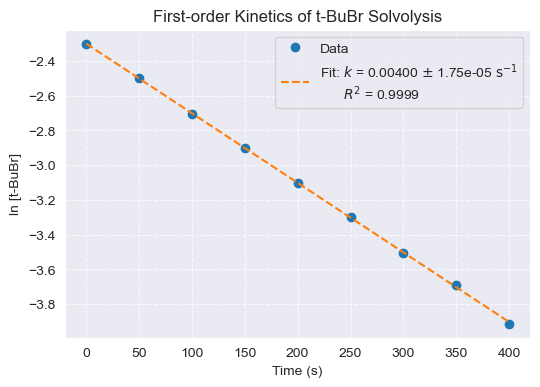

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data
data = np.loadtxt('./assets/reaction_data.csv', delimiter=',', skiprows=1)
time = data[:,0]
conc = data[:,1]

# Take ln of concentrations
ln_conc = np.log(conc)

# Linear fit with covariance
coeffs, cov = np.polyfit(time, ln_conc, 1, cov=True)
slope, intercept = coeffs
k = -slope

# Standard deviations from diagonal of covariance
slope_std, intercept_std = np.sqrt(np.diag(cov))

# Plot data + fit
plt.figure(figsize=(6,4))
plt.plot(time, ln_conc, label='Data', linestyle='', marker='o')
plt.plot(time, slope*time + intercept, linestyle='--',
         label=(rf'''Fit: $k$ = {k:.5f} $\pm$ {slope_std:.2e} $\mathrm{{s}}^{{-1}}$
      $R^2$ = {r2_score(ln_conc, slope*time + intercept):.4f}'''))
plt.xlabel('Time (s)')
plt.ylabel('ln [t-BuBr]')
plt.grid(linestyle='--', alpha=0.8)
plt.legend()
plt.title('First-order Kinetics of t-BuBr Solvolysis')
plt.show()

这是个很简单的例子，但它展示了这个工具的强大之处。你可以用它来探索数据，找到最优拟合，并评估拟合质量。

我们还可以用更少的代码来画相同的内容，这需要借助另外一个库：[Seaborn](https://seaborn.pydata.org/)。

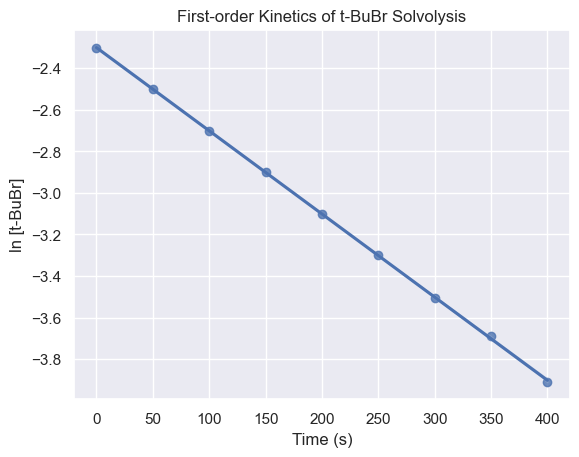

In [2]:
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.regplot(x=time, y=ln_conc)
plt.xlabel('Time (s)')
plt.ylabel('ln [t-BuBr]')
plt.title('First-order Kinetics of t-BuBr Solvolysis')
plt.show()

## 示例 2：二维势箱中的粒子

在量子力学中，[势箱模型](https://en.wikipedia.org/wiki/Particle_in_a_box)是一个应用非常广泛的模型。二维势箱模型的波函数如下所示：

$$\Psi(x, y, t) = \sqrt{\frac{4}{L_xL_y}} \sin \left( \frac{n_x \pi x}{L_x} \right) \sin \left(\frac{n_y \pi y}{L_y} \right) \cos \left(\frac{E_{n_x,n_y} t}{\hbar} \right)$$

其中

$$E_{n_x,n_y} = \frac{\pi^2\hbar^2}{2m} \left[ \left(\frac{n_x}{L_x}\right)^2 + \left(\frac{n_y}{L_y}\right)^2 \right]$$

$\hbar = \frac{h}{2\pi}$ 是[约化普朗克常数](https://en.wikipedia.org/wiki/Planck_constant#Reduced_Planck_constant), $L_x$ 和 $L_y$ 是势箱的边长，$n_x$ 和 $n_y$ 是相应的量子数。

然而，在脑海里想象这样的“二维波”并没有那么容易，所以我们通常会试着把它们画出来，让它们动起来。`pib2d.py` 这个脚本能够生成一个交互式的二维势箱模型，我们可以通过下列代码来实现。你可以试着动一动滑块来调节诸如 `t`，`nx`，`ny` 等参数的取值，回过头再看看生成的波有什么样的变化(´▽｀)

```python
import pib2d
pib2d.show_plot()
```

In [3]:
import pib2d
pib2d.show_plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=6.283185307179586, step=0.5235987755982988),…

<function pib2d.make_plot(t: float = 0, nx: int = 1, ny: int = 1)>

## 课程大纲

我们这门课非常模块化，每一个模块都专注于一个特别的主题。这里给你提供了一个简要的列表，你可以看看大概有什么内容~

- **Python 编程基础**：学习 Python 的基础知识，包括数据类型、变量、运算符、控制流、函数和模块等。
- **数据可视化**：使用诸如 Matplotlib 和 Seaborn 这样的库来创建各种类型的图表和可视化效果。
- **用 Python 做科学计算**：使用 NumPy 和 SciPy 深入探讨数值计算的主题，包括数组运算、数学上的函数和统计学分析等。
- **符号运算**：掌握使用符号进行代数运算、微积分和解方程等的方法。
- **数值方法**：学习使用数值方法寻找零点、解微分方程和解决线性代数问题，以及数值积分。
- **信号处理**：学习常见的信号处理方法，包括滤波和傅里叶变换等。
- **优化**：学习使用比基础方法更强大的算法以优化函数和模型，并进行跑分。
- **量子化学**：学习使用 PySCF 和 Psi4 等 Python 库进行量子化学计算。
- **机器学习**：学习基础的机器学习模型，以及它们在化学中的应用。
- **化学信息学**：理解化学信息学的基本概念，并整合前面所提到的工具用于药物设计、反应探究等领域的分析。
- **进阶内容**: 根据课程进度，我们可能额外再探索一些主题，例如网络爬虫、数据库管理、软件工程，还有化学中的大模型等。

## 这个笔记本怎么用

为了让这个笔记本跑起来，你得搭建一个合适的环境。本节内容就是一个教程，手把手教你安装和运行我们推荐的编辑器，也就是 JupyterLab。

### 配置环境

JupyterLab 是一个基于网页的交互式开发环境，适用于代码和数据处理。我们的课程推荐使用 JupyterLab 来运行 Python 代码，并与之交互。[Anaconda](https://www.anaconda.com/) 就包含了 JupyterLab 在内，这是一个很流行的 Python 发行版，包含了许多常用的科学计算软件包。最丝滑的 Anaconda 下载方式位于 [Anaconda 官方下载页面](https://www.anaconda.com/download/success)，从这个页面可以直接获取下载链接而不用注册账号。

<img src="./assets/anaconda_download_page.png" alt="Anaconda download page" width="50%" style="display=block; margin:auto"/>

左边这个按钮下载的是 Anaconda，而右边的按钮下载的是 Miniconda。Anaconda 是一个完整的发行版，会占用至少 5 GB 的空间。如果你的电脑空间不够，可以考虑装一个 Miniconda。Miniconda 是一个最小的发行版，只包含 Python、conda、还有其他必要的工具，通常只占用不到 500 MB 的空间，但你需要手动安装各种软件包。

如果你对任何细节还有问题，可以先去看看 [Anaconda 官方教程](https://www.anaconda.com/docs/getting-started/getting-started)有没有你需要的答案。

装好 Anaconda 之后，你会看到 Anaconda Navigator，这是一个图形化的 Anaconda 环境管理器。打开 Anaconda Navigator，你就能找到 JupyterLab 这个应用，然后点击“Launch”这个按钮就能启动。

<img src="./assets/anaconda_navigator.png" alt="Anaconda Navigator" width="50%" style="display=block; margin:auto"/>

如果你的 Python 环境不是 Anaconda，那你可能需要手动安装 JupyterLab 和其他依赖。还好我们提供了一个最小依赖列表，就是这个 `requirements.txt`。你可以在终端里运行以下命令来安装依赖：

```shell
pip install -r requirements.txt
```

在装好依赖之后，你就可以用以下命令来启动 JupyterLab 了：

```shell
jupyter lab
```

这个命令会在浏览器里打开一个新页面，然后跳转到 JupyterLab 的界面（通常位于 <http://localhost:8888/lab>）。

### 使用 JupyterLab

JupyterLab 提供了灵活而符合直觉的界面用于与笔记本交互，这个界面看起来有点像 [Visual Studio Code](https://code.visualstudio.com/)（VS Code）。你可以阅读 [JupyterLab 用户指导](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)以了解 JupyterLab 的更多特性。接下来让我们简要了解一下 JupyterLab 的界面。

<img src="./assets/jupyterlab_interface.png" alt="Interface of JupyterLab" width="50%" style="display=block; margin:auto"/>

- 顶部的**菜单栏**包含一系列菜单，用于控制界面和笔记本，并附有快捷键提示。
- **左侧栏**包含文件浏览器、内核监视器、笔记本目录和扩展管理器。
- **主界面**包含笔记本的编辑器，代码都是在这里编写和运行的。
- **右侧栏**包含元数据查看器和代码调试器。
- 底部的**状态栏**展示了当前的笔记本、内核等信息。

#### 笔记本的组成

Jupyter 的笔记本由若干单元格组成，主要分为代码单元格和 Markdown 单元格。要创建一个单元格，你需要选中你想要创建单元格位置上方的单元格。选中后，左侧会出现一条蓝色的竖线。然后，你就可以点击工具栏上的“+”按钮，在选中单元格的下方创建一个新单元格。

<img src="./assets/main_insert_below.png" alt="Create cell" width="50%" style="display=block; margin:auto"/>

代码单元格用于编写和执行 Python 代码。就像我们在示例 1 里提到的那样，你可以按 <kbd>Shift</kbd> + <kbd>Enter</kbd> 快捷键（在 Mac 上是 <kbd>Shift</kbd> + <kbd>Return</kbd>），或者点击工具栏里的“Run”按钮来运行代码。

<img src="./assets/main_run_cell.png" alt="Run cell" width="50%" style="display=block; margin:auto"/>

代码单元格可能会在底下显示代码的输出，这些输出可以是文本、图片或其他媒体形式。当你选中一个包含输出的代码单元格，左侧的蓝线会在单元格和输出的边界处断开。

<img src="./assets/code_cell.png" alt="Code cell output" width="50%" style="display=block; margin:auto"/>

Markdown 单元格用于编写文本内容，我们稍后就会学到 Markdown 是如何用简单的语法渲染出丰富的样式。

<img src="./assets/markdown_cell.png" alt="Markdown cell" width="50%" style="display=block; margin:auto"/>

要编辑 Markdown 单元格，你只需要双击该单元格就能进入编辑模式。当你完成编辑后，“执行”该单元格（记住这个快捷键或按钮）就能看到渲染结果。

<img src="./assets/markdown_edit.png" alt="Edit Markdown cell" width="50%" style="display=block; margin:auto"/>

对了，把光标移到你感兴趣的按钮上，就能看到这个按钮的说明，以及对应的快捷键（如果有的话）。还有，你可以通过工具栏的下拉菜单来改变某个单元格的类型（代码、Markdown 或原始文本）。

<img src="./assets/toolbar_widgets.png" alt="Toolbar widgets" width="50%" style="display=block; margin:auto"/>

当你选中一个单元格，它的右上角会浮现出一系列小控件，每一个控件都对应下表列出的一个单元格操作：

| Widget                                             | Description | Default Shortcut                                 |
|----------------------------------------------------|-------------|--------------------------------------------------|
| ![Duplicated cell](assets/cell_duplicate.png)      | 复制当前单元格     | None                                             |
| ![Move cell up](assets/cell_move_up.png)           | 把当前单元格往上移一格 | <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Up</kbd>   |
| ![Move cell down](assets/cell_move_down.png)       | 把当前单元格往下移一格 | <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Down</kbd> |
| ![Insert cell above](assets/cell_insert_above.png) | 在上方插入新的单元格  | <kbd>A</kbd>                                     |
| ![Insert cell below](assets/cell_insert_below.png) | 在下方插入新的单元格  | <kbd>B</kbd>                                     |
| ![Delete cell](assets/cell_delete.png)             | 删除单元格       | <kbd>D</kbd>, <kbd>D</kbd> (double press)        |

除了快捷键或按钮，你也可以直接按住单元格的左侧空白区域来拖动它们。以及，按住 <kbd>Shift</kbd> 再点击单元格可以进行多选，然后你可以同时移动这些选中的单元格。

#### 菜单栏

现在让我们仔细看看菜单栏：它让你可以控制整个界面和笔记本。以下是你正式使用 JupyterLab 之前应该了解的关键内容。

文件菜单（File）允许你打开、保存和创建新的笔记本，你还可以把笔记本导出为多种格式。以下是一些重要的快捷键和功能：
- <kbd>Ctrl</kbd>+<kbd>S</kbd> 用于保存你的笔记本，当然你也可以在设置中启用自动保存。
- <kbd>Alt</kbd>+<kbd>W</kbd> 用于关闭当前笔记本，因为 <kbd>Ctrl</kbd>+<kbd>W</kbd> 已经被浏览器用来关闭标签页了。
- 子菜单“Save and Export Notebook As”允许你以多种格式保存你的笔记本，包括 HTML、PDF 和 Markdown。
- 要创建一个新的笔记本，展开“New”子菜单并选择“Notebook”。

<img src="./assets/menu_file.png" alt="File menu" width="50%" style="display=block; margin:auto"/>

编辑菜单（Edit）允许你编辑笔记本，包括剪切、复制、粘贴，以及撤销/重做。以下是一些重要的快捷键和功能：
- 就像大部分文本编辑器一样，<kbd>Ctrl</kbd>+<kbd>Z</kbd> 和 <kbd>Ctrl</kbd>+<kbd>Shift</kbd>+<kbd>Z</kbd> 用于撤销和重做单元格内部的编辑。
- 对应地，那些不含 <kbd>Ctrl</kbd> 的快捷键则用于单元格操作，例如：
    - <kbd>Z</kbd> 用于撤销最近的单元格操作。
    - <kbd>Shift</kbd>+<kbd>Z</kbd> 重做最近撤销的单元格操作。
    - <kbd>X</kbd>、<kbd>C</kbd> 和 <kbd>V</kbd> 用于剪切、复制和粘贴单元格。

<img src="./assets/menu_edit.png" alt="Edit menu" width="50%" style="display=block; margin:auto"/>

运行菜单（Run）允许你运行和调试笔记本，包括运行单个或所有单元格，以及重启内核。在大部分情景下，你只需要记住 <kbd>Shift</kbd>+<kbd>Enter</kbd> 是运行当前单元格就够了。如果你打算渲染所有 Markdown 单元格，或者在不重启内核的前提下运行所有代码，那就需要从这个菜单里访问对应的选项了。

<img src="./assets/menu_run.png" alt="Run menu" width="50%" style="display=block; margin:auto"/>

内核菜单（Kernel）允许你启动、关闭、重启和更换内核。目前，你可以把内核当成执行代码和渲染 Markdown 的后台进程。当你在执行代码时遇到问题时，通常的对策包括重启内核，清理输出，以及从头运行代码。前述功能都可以在这个菜单找到。

<img src="./assets/menu_kernel.png" alt="Kernel menu" width="50%" style="display=block; margin:auto"/>

### 关于 Jupyter Notebook

你们可能听说过 Jupyter Notebook，这也是一个基于网页的交互式开发环境。在 JupyterLab 问世前，Jupyter Notebook 就是默认的 Jupyter 界面。不过现在我们已经不再推荐使用了，因为最新版本的 Jupyter Notebook 就是基于 JupyterLab 构建的，并且在将来很可能就直接并入 JupyterLab 了。

<img src="./assets/jupyter_notebook_interface.png" alt="Jupyter Notebook interface" width="50%" style="display=block; margin:auto"/>

### 其他集成开发环境（IDE）

市面上还存在许多针对 Python 设计的 IDE，例如 [PyCharm](https://www.jetbrains.com/pycharm/)，[VS Code](https://code.visualstudio.com/)，以及 [Spyder](https://www.spyder-ide.org/)。这些 IDE 都是为了不同的用途定制的，你可以根据需求自行选择。

## Markdown 语言

Markdown 是一门轻量级的标记语言，以简单的纯文本标记（如 `#`、`*`、<code>`</code>）来创建格式化的文档（标题、列表、链接、代码等）。Jupyter 支持 Markdown 单元格，可以从 Markdown 文本（包括 LaTeX 数学、图片和基本的 HTML）渲染出精美的文档，并和代码一起组成交互式笔记本。让我们通过一些例子来介绍它们。

### 基本语法

```markdown
Markdown 支持诸如 **粗体**、*斜体* 以及 ~~删除线~~ 等基本语法。使用 `_` 而非 `*` 也可以渲染出 __粗体__ 和 _斜体_ 效果。组合两种效果，我们还能得到 **_粗斜体_**。

简单的换行在渲染时会被当成空格处理。
空行会作为段落的分隔。
一行末尾的两个空格会被渲染成段落内的换行。
```

Markdown 支持诸如 **粗体**、*斜体* 以及 ~~删除线~~ 等基本语法。使用 `_` 而非 `*` 也可以渲染出 __粗体__ 和 _斜体_ 效果。组合两种效果，我们还能得到 **_粗斜体_**。

简单的换行在渲染时会被当成空格处理。
空行会作为段落的分隔。
一行末尾的两个空格会被渲染成段落内的换行。

### 标题

```markdown
# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6
```

由 `#` 开头的行是标题，`#` 的数量代表标题所在的层级。为了避免影响排版，这里展示的是渲染效果的截图：

<img src="./assets/markdown_headings.png" alt="Headings in Markdown" width="50%" style="display=block; margin:auto"/>

### 引用

```markdown
> 由 `>` 开头的行是引用。
>
> 引用可以跨越多行，只要这些行都以 `>` 开头。
>
> > 引用可以叠加。
> > 其他 **语法** 也能在 _引用_ 内部 ~~使用~~。
```

> 由 `>` 开头的行是引用。
>
> 引用可以跨越多行，只要这些行都以 `>` 开头。
>
> > 引用可以嵌套。
> > 其他 **语法** 也能在 _引用_ 内部 ~~使用~~。

### 列表

```markdown
- 这是无序列表
- 由 `-`、`+` 或 `*` 开头
    - 可以嵌套
    - 只需要保持相同缩进

1. 这是有序列表
2. 由 `1.`、`2.` 等数字开头
    1. 也可以嵌套
    1. 可以用相同的数字开头

* 嵌套列表的
    1. 每一层级
        + 都是独立的
            1. 包括数字
```

- 这是无序列表
- 由 `-`、`+` 或 `*` 开头
    - 可以嵌套
    - 只需要保持相同缩进

1. 这是有序列表
2. 由 `1.`、`2.` 等数字开头
    1. 也可以嵌套
    1. 可以用相同的数字开头

* 嵌套列表的
    1. 每一层级
        + 都是独立的
            1. 包括数字

### 链接和图像

```markdown
Markdown 支持链接和图像。根据 [Markdown 的维基百科页面](https://en.wikipedia.org/wiki/Markdown)，链接分为两部分：要显示的文本和链接地址。文本被方括号（`[]`）包围，而链接被小括号（`()`）包围。

图像都语法和链接类似，唯一的区别是图像都代码以 `!` 起始，并且方括号中的文本被视为图像的标题。

![Markdown 标志](./assets/markdown_mark.svg)
```

Markdown 支持链接和图像。根据 [Markdown 的维基百科页面](https://en.wikipedia.org/wiki/Markdown)，链接分为两部分：要显示的文本和链接地址。文本被方括号（`[]`）包围，而链接被小括号（`()`）包围。

图像都语法和链接类似，唯一的区别是图像都代码以 `!` 起始，并且方括号中的文本被视为图像的标题。

![Markdown 标志](./assets/markdown_mark.svg)

### 表格

```markdown
| 语法       | 标记             | 示例            |
|----------|----------------|---------------|
| 粗体       | `**`           | **粗体**        |
| 斜体       | `_`            | _斜体_          |
| 删除线      | `~~`           | ~~删除线~~       |
| 行内代码     | <code>`</code> | `行内代码`        |
| 行内 LaTeX | `$`            | $\hat{H} = E$ |
```

表格是展示数据的常用手段，语法略微有些复杂：
- 表格的每一行都由被 `|` 分隔与包围的单元格构成。
- 第一行称为表头。
- 第二行作为表头和内容的分隔。
- 剩下的行就是表格的内容，每一列都由 `|` 分隔并包围。

| 语法       | 标记             | 示例            |
|----------|----------------|---------------|
| 粗体       | `**`           | **粗体**        |
| 斜体       | `_`            | _斜体_          |
| 删除线      | `~~`           | ~~删除线~~       |
| 行内代码     | <code>`</code> | `行内代码`        |
| 行内 LaTeX | `$`            | $\hat{H} = E$ |

### 代码

``````markdown
Markdown 支持两种类型的代码环境。`行内代码` 由单个反引号包围（<code>`</code>），而代码块则由三重反引号包围（<code>```</code>）。三重反引号后面紧跟着的语言名称是可选的，它能让 Markdown 正确高亮代码的语法。

```python
if __name__ == "__main__":
    print("代码块")
```
``````

Markdown 支持两种类型的代码环境。`行内代码` 由单个反引号包围（<code>`</code>），而代码块则由三重反引号包围（<code>```</code>）。三重反引号后面紧跟着的语言名称是可选的，它能让 Markdown 正确高亮代码的语法。

```python
if __name__ == "__main__":
    print("代码块")
```

### LaTeX

[LaTeX](https://www.latex-project.org/) 是一门强大的、可扩展的排版语言。许多学术期刊都支持并推荐使用他们的 LaTeX 模板来发表文章。然而，在你的电脑上配置 LaTeX 环境可能会成为痛苦来源。因此，我们推荐在 [Overleaf](https://www.overleaf.com/) 这个平台上管理你的 LaTeX 项目。他们还提供了一个简单易学的 [LaTeX 教程](https://www.overleaf.com/learn)，兼具广度与深度。

```markdown
Jupyter 的 Markdown 单元格支持 LaTeX 扩展，主要是数学公式。你可以使用单重美元符号（`$`）来渲染行内公式，如 $\hat{H}\psi = E\psi$；还可以用双重美元符号（`$$`）来渲染独立公式：

$$
-\frac{\hbar^2}{2m}\nabla^2\Psi + \hat{V}\Psi = i\hbar\frac{\partial}{\partial t} \Psi
$$
```

Jupyter 的 Markdown 单元格支持 LaTeX 扩展，主要是数学公式。你可以使用单重美元符号（`$`）来渲染行内公式，如 $\hat{H}\psi = E\psi$；还可以用双重美元符号（`$$`）来渲染独立公式：

$$
-\frac{\hbar^2}{2m}\nabla^2\Psi + \hat{V}\Psi = i\hbar\frac{\partial}{\partial t} \Psi
$$

### 内联 HTML

```markdown
对于那些 Markdown 本身不支持的功能，你可以使用 <a href="https://developer.mozilla.org/en-US/docs/Web/HTML">HTML</a> 标签来实现。举个例子，标签 `<u>` 可以生成<u>下划线</u>；还有我们之前见到的，用 `<code>` 生成 <code>行内代码</code>。
```

对于那些 Markdown 本身不支持的功能，你可以使用 <a href="https://developer.mozilla.org/en-US/docs/Web/HTML">HTML</a> 标签来实现。举个例子，标签 `<u>` 可以生成<u>下划线</u>；还有我们之前见到的，用 `<code>` 生成 <code>行内代码</code>。

## 致谢

这门课程借鉴了以下来源的灵感：

- [Anaconda](https://www.anaconda.com/) 提供了开箱即用的 Python 环境
- [Jupyter 项目](https://jupyter.org/)提供了交互式的代码编辑器
- 生成式人工智能帮我们写了不少代码(・ω< )★
- 还有来自 Reddit、StackExchange 等平台的众多资源！